# Sales Analysis


## 1. Data Wrangling

In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All library imported')

All library imported


In [2]:
# load the dataset
data=pd.read_csv('AusApparalSales4thQrt2020.csv')
print('Data imported')

Data imported


In [3]:
data

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [4]:
# inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [5]:
# data missing values
data.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [6]:
# data describe
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [7]:
# other details of data
data['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [8]:
data['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [9]:
data['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [11]:
data

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


### Data Normalization technique suits this data

In [10]:
df=data.copy()

In [12]:
# standard scaling
# st= value-mean/std
df['Sales']=(df['Sales']-df['Sales'].mean())/df['Sales'].std()
df['Unit']=(df['Unit']-df['Unit'].mean())/df['Unit'].std()

In [13]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,-0.775530,-0.775530
1,1-Oct-2020,Morning,WA,Men,-0.775530,-0.775530
2,1-Oct-2020,Morning,WA,Women,-1.085574,-1.085574
3,1-Oct-2020,Morning,WA,Seniors,-0.232953,-0.232953
4,1-Oct-2020,Afternoon,WA,Kids,-1.163085,-1.163085
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,-0.310464,-0.310464
7556,30-Dec-2020,Evening,TAS,Kids,-0.232953,-0.232953
7557,30-Dec-2020,Evening,TAS,Men,-0.232953,-0.232953
7558,30-Dec-2020,Evening,TAS,Women,-0.542997,-0.542997


## Data Analysis

### Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [15]:
data.groupby(['State','Group']).sum('Sales')

Unit     Sales
State Group                    
 NSW   Kids      7435  18587500
       Men       7609  19022500
       Seniors   7275  18187500
       Women     7669  19172500
 NT    Kids      2280   5700000
       Men       2305   5762500
       Seniors   2186   5465000
       Women     2261   5652500
 QLD   Kids      3404   8510000
       Men       3357   8392500
       Seniors   3276   8190000
       Women     3330   8325000
 SA    Kids      5806  14515000
       Men       5862  14655000
       Seniors   5887  14717500
       Women     5988  14970000
 TAS   Kids      2310   5775000
       Men       2303   5757500
       Seniors   2260   5650000
       Women     2231   5577500
 VIC   Kids     10544  26360000
       Men      10563  26407500
       Seniors  10526  26315000
       Women    10593  26482500
 WA    Kids      2250   5625000
       Men       2301   5752500
       Seniors   2205   5512500
       Women     2105   5262500

In [18]:
data.groupby(['State']).sum('Sales')

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


In [19]:
# highest and lowest sales
highest_sales_state=data.groupby(['State']).sum('Sales').idxmax()
lowest_sales_state=data.groupby(['State']).sum('Sales').idxmin()
print('Highest Sales State',highest_sales_state)
print('Lowest Sales State',lowest_sales_state)

Highest Sales State Unit      VIC
Sales     VIC
dtype: object
Lowest Sales State Unit      WA
Sales     WA
dtype: object


In [21]:
# highest and lowest Group
highest_sales_Group=data.groupby(['Group']).sum('Sales').idxmax()
lowest_sales_Group=data.groupby(['Group']).sum('Sales').idxmin()
print('Highest Sales Group',highest_sales_Group)
print('Lowest Sales Group',lowest_sales_Group)

Highest Sales Group Unit      Men
Sales     Men
dtype: object
Lowest Sales Group Unit      Seniors
Sales     Seniors
dtype: object


## Details on time data

In [22]:
data.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [23]:
# convert the date col in datetime format
data['Date']=pd.to_datetime(df['Date'])
data.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [24]:
data['Date']

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]

In [31]:
weekly_sales=data.resample('W',on='Date')['Sales'].sum()
print(weekly_sales)

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64


In [26]:
Month_sales=data.resample('M',on='Date')['Sales'].sum()
print(Month_sales)

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64


In [27]:
Month_sales.max()

135330000

In [28]:
Quarter_sales=data.resample('Q',on='Date')['Sales'].sum()
print(Quarter_sales)

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


# Data Visualization

###  State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

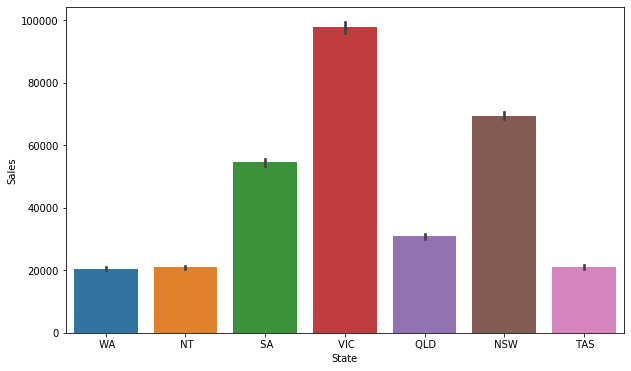

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['State'],y=data['Sales'])
plt.show()

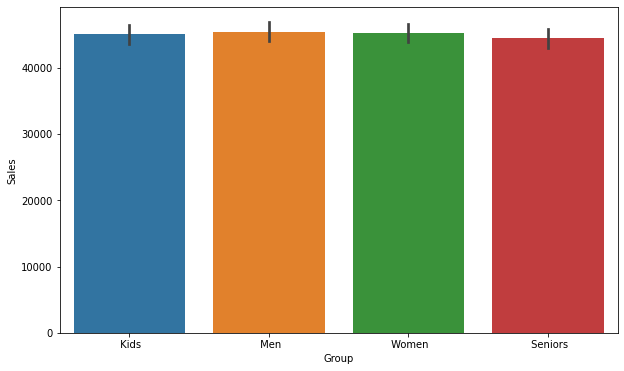

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['Group'],y=data['Sales'])
plt.show()

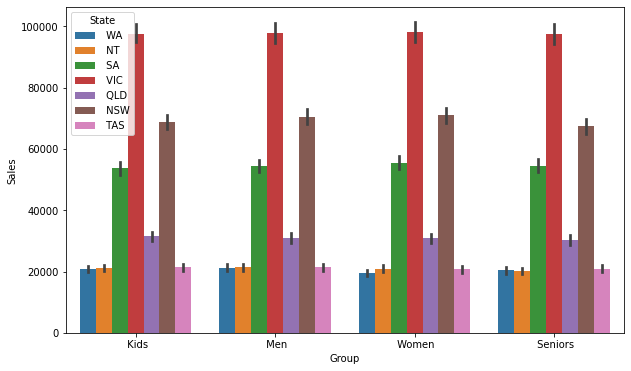

In [34]:
# group wise sales acc to states
plt.figure(figsize=(10,6))
sns.barplot(x=data['Group'],y=data['Sales'],hue='State',data=data)
plt.show()

In [37]:
data

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


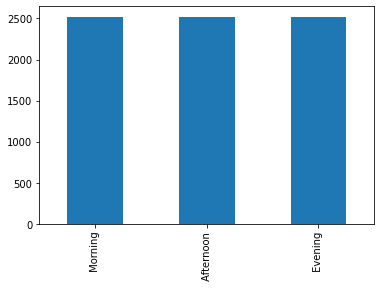

In [38]:
# Time of the day analysis
data['Time'].value_counts().plot(kind='bar')
plt.show()

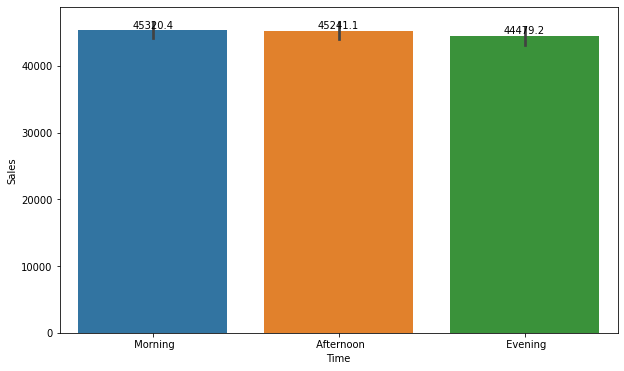

In [42]:
# Time vs Sales Analysis
plt.figure(figsize=(10,6))
ax=sns.barplot(x=data['Time'],y=data['Sales'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

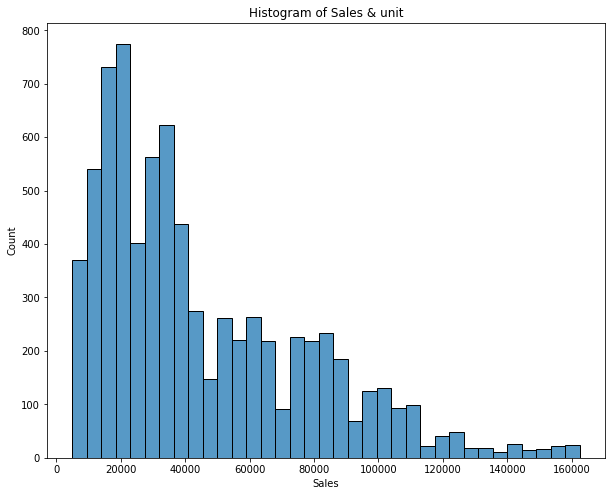

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(x=data['Sales'])
plt.title('Histogram of Sales')
plt.show()

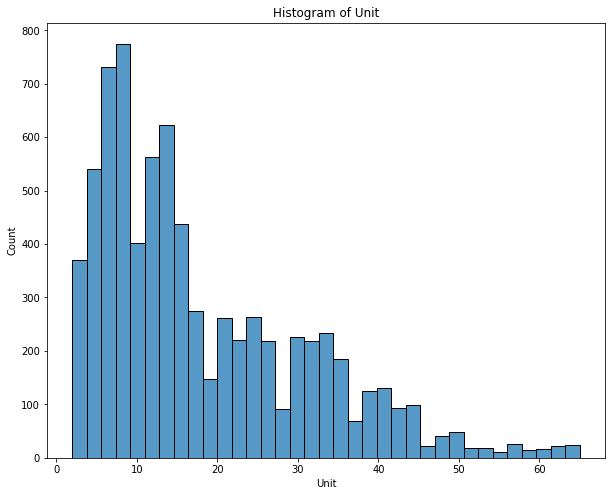

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(x=data['Unit'])
plt.title('Histogram of Unit')
plt.show()

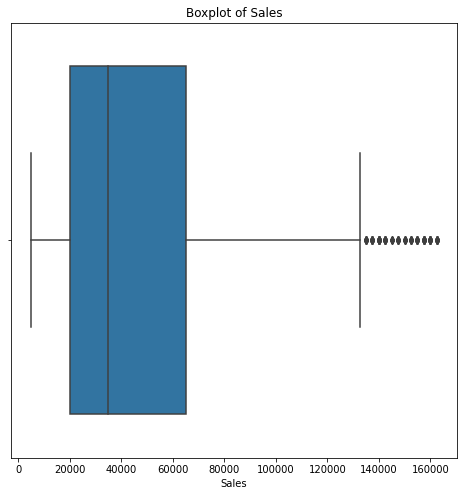

In [49]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

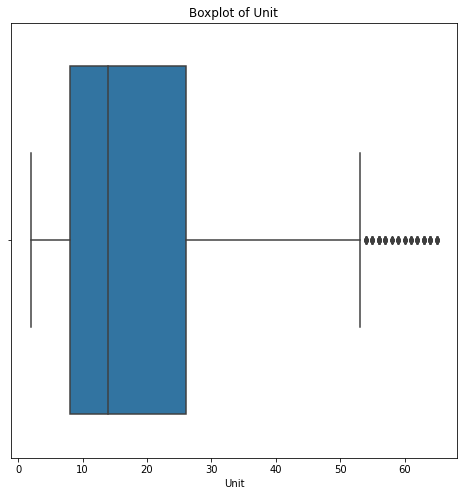

In [50]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data['Unit'])
plt.title('Boxplot of Unit')
plt.show()

/tmp/ipykernel_122/3068639965.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['Sales'])


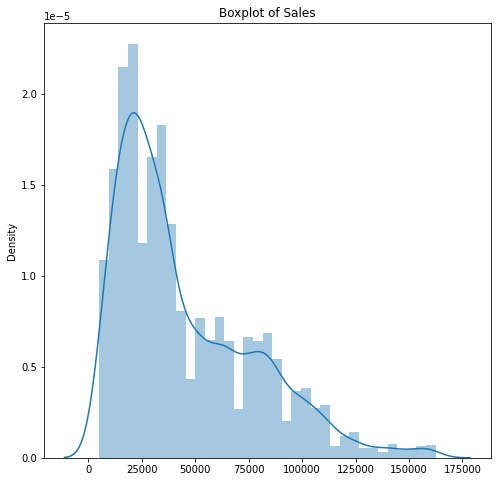

In [51]:
plt.figure(figsize=(8,8))
sns.distplot(x=data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

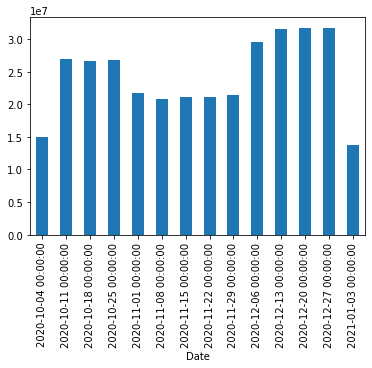

In [53]:
data.resample('W',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

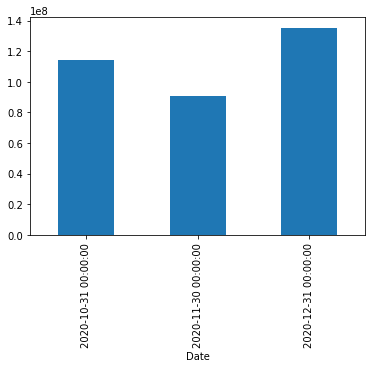

In [54]:
data.resample('M',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()